In [1]:
import requests 
import pandas as pd 
import numpy as np 
import sqlite3 as sql
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Precipitation Data

In [2]:
prcp_df = pd.read_csv("prcp.csv")
date_str = [d.replace("-", "")[:8] for d in prcp_df["datetime"]]
prcp_df["datetime"] = [dt.strptime(d, "%Y%m%d") for d in date_str]

In [3]:
prcp_df.loc[prcp_df['datetime'] == '2000-03-18']

,datetime,PRCP_Eureka,PRCP_SantaCruz,PRCP_SantaMaria,PRCP_LosAngeles,PRCP_SanDiego
67,2000-03-18,0.2,0.2,0.0,0.0,0.0


In [4]:
prcp_df.loc[prcp_df['datetime'] == "2000-11-13"]

,datetime,PRCP_Eureka,PRCP_SantaCruz,PRCP_SantaMaria,PRCP_LosAngeles,PRCP_SanDiego
262,2000-11-13,0.72,0.72,0.0,0.0,0.0


In [5]:
prcp_df = prcp_df.drop(range(66)).drop(range(263, 300))
prcp_df = prcp_df.set_index("datetime")
prcp_df

,PRCP_Eureka,PRCP_SantaCruz,PRCP_SantaMaria,PRCP_LosAngeles,PRCP_SanDiego
datetime,,,,,
2000-03-17,0.00,0.00,0.0,0.0,0.00
2000-03-18,0.20,0.20,0.0,0.0,0.00
2000-03-19,0.01,0.01,0.0,0.0,0.00
2000-03-20,0.00,0.00,0.0,0.0,0.10
2000-03-21,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...
2000-11-09,0.44,0.44,0.0,0.0,0.00
2000-11-10,0.00,0.00,0.0,0.0,0.26
2000-11-11,0.00,0.00,0.0,0.0,0.00


In [6]:
prcp_df["PRCP"] = prcp_df.copy().mean(numeric_only=True, axis=1)
prcp_df

,PRCP_Eureka,PRCP_SantaCruz,PRCP_SantaMaria,PRCP_LosAngeles,PRCP_SanDiego,PRCP
datetime,,,,,,
2000-03-17,0.00,0.00,0.0,0.0,0.00,0.000
2000-03-18,0.20,0.20,0.0,0.0,0.00,0.080
2000-03-19,0.01,0.01,0.0,0.0,0.00,0.004
2000-03-20,0.00,0.00,0.0,0.0,0.10,0.020
2000-03-21,0.00,0.00,0.0,0.0,0.00,0.000
...,...,...,...,...,...,...
2000-11-09,0.44,0.44,0.0,0.0,0.00,0.176
2000-11-10,0.00,0.00,0.0,0.0,0.26,0.052
2000-11-11,0.00,0.00,0.0,0.0,0.00,0.000


In [7]:
norm_prcp = (prcp_df-prcp_df.mean())/prcp_df.std()
norm_prcp

,PRCP_Eureka,PRCP_SantaCruz,PRCP_SantaMaria,PRCP_LosAngeles,PRCP_SanDiego,PRCP
datetime,,,,,,
2000-03-17,-0.329879,-0.329879,-0.10518,-0.09823,-0.151374,-0.264388
2000-03-18,1.366887,1.366887,-0.10518,-0.09823,-0.151374,0.707336
2000-03-19,-0.245041,-0.245041,-0.10518,-0.09823,-0.151374,-0.215802
2000-03-20,-0.329879,-0.329879,-0.10518,-0.09823,2.609805,-0.021457
2000-03-21,-0.329879,-0.329879,-0.10518,-0.09823,-0.151374,-0.264388
...,...,...,...,...,...,...
2000-11-09,3.403006,3.403006,-0.10518,-0.09823,-0.151374,1.873405
2000-11-10,-0.329879,-0.329879,-0.10518,-0.09823,7.027691,0.367233
2000-11-11,-0.329879,-0.329879,-0.10518,-0.09823,-0.151374,-0.264388


In [8]:
norm_prcp.index

DatetimeIndex(['2000-03-17', '2000-03-18', '2000-03-19', '2000-03-20',
               '2000-03-21', '2000-03-22', '2000-03-23', '2000-03-24',
               '2000-03-25', '2000-04-01',
               ...
               '2000-11-04', '2000-11-05', '2000-11-06', '2000-11-07',
               '2000-11-08', '2000-11-09', '2000-11-10', '2000-11-11',
               '2000-11-12', '2000-11-13'],
              dtype='datetime64[ns]', name='datetime', length=197, freq=None)

### Sea Data

In [9]:
sea_df = pd.read_csv("sea.csv")
date_str = [d.replace("-", "")[:8] for d in sea_df["datetime"]]
sea_df["datetime"] = [dt.strptime(d, "%Y%m%d") for d in date_str]
sea_df = sea_df.set_index("datetime")

In [10]:
sea_df

,date,lat,long,co2_eq,co2_air,temp_eq,pressure,temp_therm,salinity,fug_eq,fug_sea,fug_air,fco2_sea
datetime,,,,,,,,,,,,,
2000-03-18,18032000,47.726,-126.424,NaN,375.75,9.11,1012.60,8.69,32.59,NaN,NaN,369.63,NaN
2000-03-18,18032000,47.719,-126.440,NaN,375.75,9.09,1012.07,8.69,32.59,NaN,NaN,369.63,NaN
2000-03-18,18032000,47.712,-126.455,NaN,375.75,9.09,1012.12,8.67,32.58,NaN,NaN,369.63,NaN
2000-03-18,18032000,47.704,-126.471,NaN,375.75,9.09,1011.93,8.67,32.59,NaN,NaN,369.63,NaN
2000-03-18,18032000,47.676,-126.525,NaN,375.75,9.06,1011.61,8.64,32.59,NaN,NaN,369.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-11-13,13112000,11.803,-94.333,437.40,367.80,28.57,1011.20,28.50,33.18,418.73,417.65,352.03,65.63
2000-11-13,13112000,11.797,-94.316,437.31,367.80,28.51,1011.17,28.50,33.21,418.63,418.43,352.03,66.40
2000-11-13,13112000,11.790,-94.298,437.91,367.80,28.58,1011.11,28.58,33.19,419.11,419.11,352.03,67.08


In [11]:
err = sea_df.loc[sea_df["salinity"] == min(sea_df["salinity"])].index
sea_df = sea_df.drop(err)

In [12]:
sea_daily = sea_df.groupby("datetime").mean()
norm_sea_daily = sea_daily.copy(deep=True)
norm_sea_daily.iloc[:,3:] = norm_sea_daily.iloc[:,3:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
norm_sea_daily

,date,lat,long,co2_eq,co2_air,temp_eq,pressure,temp_therm,salinity,fug_eq,fug_sea,fug_air,fco2_sea
datetime,,,,,,,,,,,,,
2000-03-18,18032000.0,47.139260,-127.538354,-0.469969,1.216408,-1.100227,-0.799093,-1.095953,-0.266286,-0.447561,-0.485870,0.864653,-0.590970
2000-03-19,19032000.0,46.100437,-129.452880,-0.491263,1.603869,-1.067262,0.461325,-1.066226,-0.219922,-0.438833,-0.469315,1.535304,-0.626887
2000-03-20,20032000.0,43.301573,-130.282516,-0.719019,1.418453,-0.917351,2.039307,-0.917597,-0.158358,-0.630116,-0.649801,1.835829,-0.833340
2000-03-21,21032000.0,43.359016,-129.061094,-0.673061,0.762776,-0.882506,1.499799,-0.884046,-0.147086,-0.599791,-0.627617,1.248309,-0.744367
2000-03-22,22032000.0,44.255968,-125.482331,-0.755544,0.920334,-0.794829,-0.040446,-0.791703,-0.445299,-0.740367,-0.754702,0.879373,-0.839424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-11-09,9112000.0,6.061755,-94.979083,-0.110147,0.030250,1.772237,-1.535928,1.773727,0.240914,-0.267128,-0.199731,-1.231002,-0.034176
2000-11-10,10112000.0,8.047693,-94.943354,1.199149,-0.079202,1.737244,-1.492846,1.737278,0.384138,1.058056,1.117732,-1.256781,1.204204
2000-11-11,11112000.0,9.778255,-94.994094,1.571110,-0.120811,1.759422,-1.414262,1.760831,0.275598,1.434187,1.496441,-1.280531,1.570301


In [13]:
norm_sea = sea_df.copy(deep=True)
norm_sea.iloc[:,3:] = norm_sea.iloc[:,3:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
norm_sea

,date,lat,long,co2_eq,co2_air,temp_eq,pressure,temp_therm,salinity,fug_eq,fug_sea,fug_air,fco2_sea
datetime,,,,,,,,,,,,,
2000-03-18,18032000,47.726,-126.424,NaN,1.561831,-1.106690,-0.929920,-1.098641,-0.381860,NaN,NaN,1.030871,NaN
2000-03-18,18032000,47.719,-126.440,NaN,1.561831,-1.109852,-1.023475,-1.098641,-0.381860,NaN,NaN,1.030871,NaN
2000-03-18,18032000,47.712,-126.455,NaN,1.561831,-1.109852,-1.014649,-1.101740,-0.391690,NaN,NaN,1.030871,NaN
2000-03-18,18032000,47.704,-126.471,NaN,1.561831,-1.109852,-1.048188,-1.101740,-0.381860,NaN,NaN,1.030871,NaN
2000-03-18,18032000,47.676,-126.525,NaN,1.561831,-1.114595,-1.104674,-1.106388,-0.381860,NaN,NaN,1.030871,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-11-13,13112000,11.803,-94.333,0.954054,-0.240444,1.970166,-1.177047,1.970641,0.198156,0.803051,0.867214,-1.468078,1.008965
2000-11-13,13112000,11.797,-94.316,0.952596,-0.240444,1.960680,-1.182342,1.970641,0.227648,0.801351,0.880457,-1.468078,1.021514
2000-11-13,13112000,11.790,-94.298,0.962316,-0.240444,1.971747,-1.192934,1.983035,0.207986,0.809508,0.892003,-1.468078,1.032596


### Plots of Normalized Data

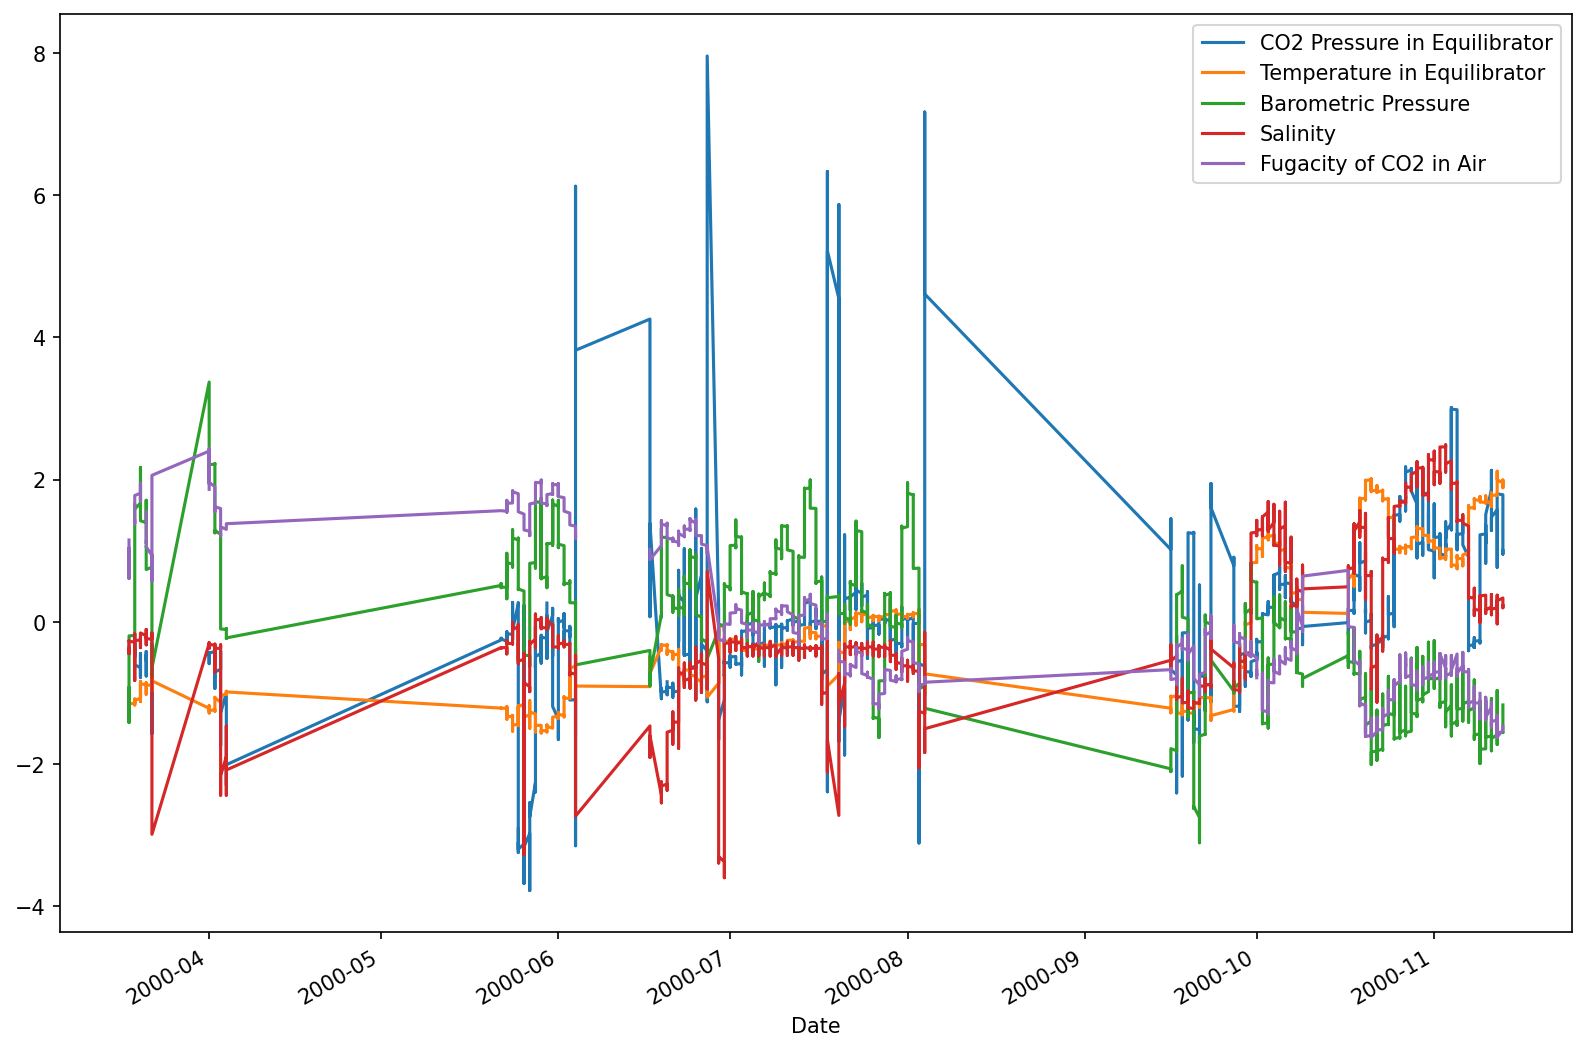

In [14]:
plt.figure(figsize=(13, 9), dpi=150)
norm_sea["co2_eq"].plot()
norm_sea["temp_eq"].plot()
norm_sea["pressure"].plot()
norm_sea["salinity"].plot()
norm_sea["fug_air"].plot()
plt.xlabel('Date')
plt.legend(["CO2 Pressure in Equilibrator", "Temperature in Equilibrator", "Barometric Pressure", 
            "Salinity", "Fugacity of CO2 in Air"])
plt.show()

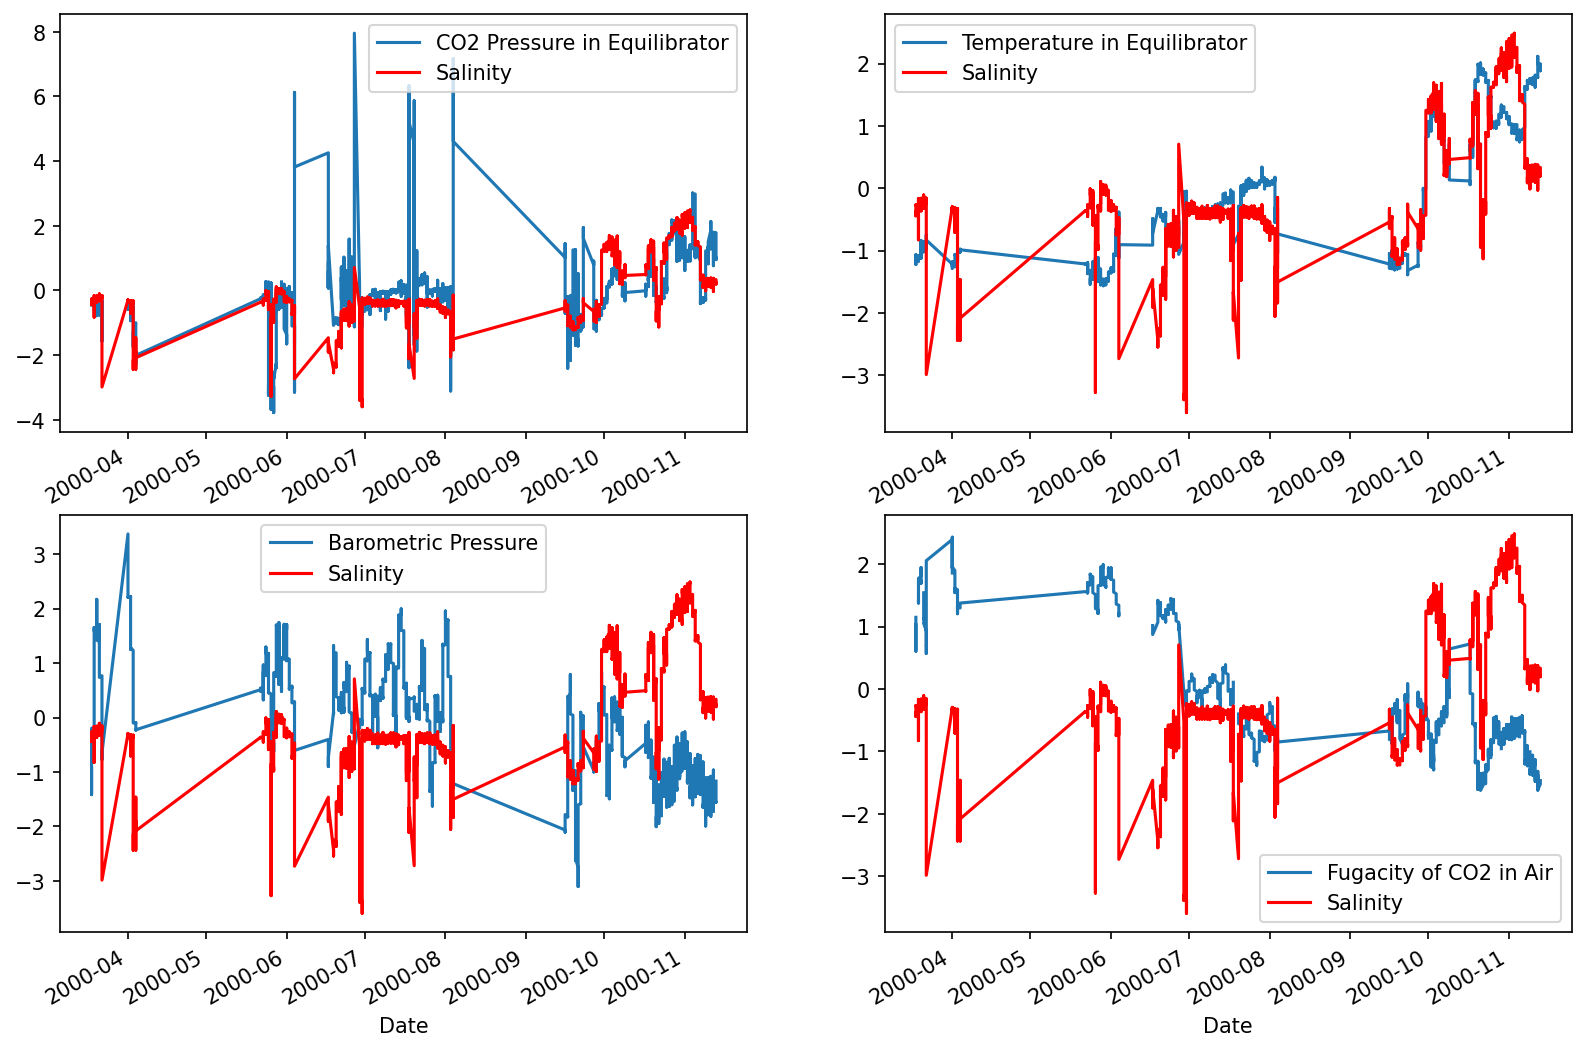

In [15]:
plt.figure(figsize=(13, 9), dpi=150)
plt.subplot(2, 2, 1)
norm_sea["co2_eq"].plot()
norm_sea["salinity"].plot(color = "red")
plt.xlabel("Date")
plt.legend(["CO2 Pressure in Equilibrator", "Salinity"])

plt.subplot(2, 2, 2)
norm_sea["temp_eq"].plot()
norm_sea["salinity"].plot(color = "red")
plt.legend(["Temperature in Equilibrator", "Salinity"])

plt.subplot(2, 2, 3)
norm_sea["pressure"].plot()
norm_sea["salinity"].plot(color = "red")
plt.xlabel("Date")
plt.legend(["Barometric Pressure", "Salinity"])

plt.subplot(2, 2, 4)
norm_sea["fug_air"].plot()
norm_sea["salinity"].plot(color = "red")
plt.xlabel('Date')
plt.legend(['Fugacity of CO2 in Air', 'Salinity'])
plt.show()

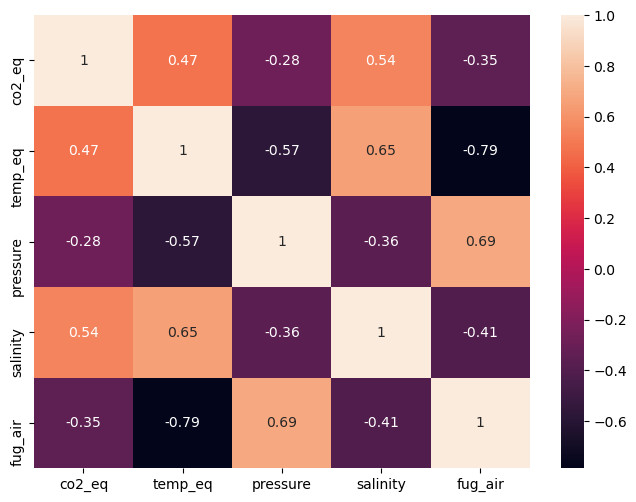

In [16]:
plt.figure(figsize=(8, 6), dpi=100)
corr = norm_sea.iloc[:,[3, 5, 6, 8, 11]].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True)
plt.show()

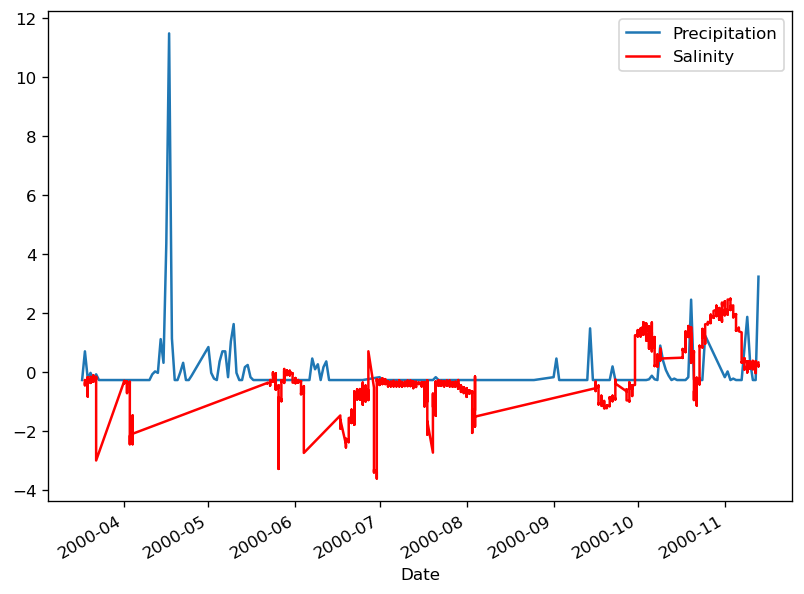

In [17]:
plt.figure(figsize=(8, 6), dpi=120)
norm_prcp["PRCP"].plot()
norm_sea["salinity"].plot(color = "red")
plt.xlabel("Date")
plt.legend(["Precipitation", "Salinity"])
plt.show()